In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn.tree import DecisionTreeClassifier
penguins = penguins.dropna()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [6]:
features= ['body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=1)

In [7]:
from sklearn import tree
import graphviz
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

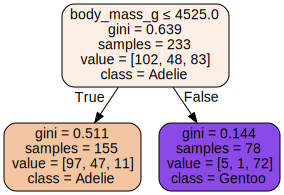

In [8]:
plot_tree_classification(dt_classification, features, penguins.species.unique())

In [9]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [10]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7253218884120172
Accuracy on test set 0.73


Er is een minimaal verschil tusssen de training set en de test set bij een diepte van 2. Ik had verwacht dat hier een groter verschil tussen zou ziten(Accuracy on training set 0.7253218884120172 Accuracy on test set 0.73). Op het moment dat ik de diepte van de tree groter zet naar 100 wordt het verschil wel groter, maar dit gaat eigenlijk een andere kant op dan ik had verwacht. De accuratie van de testset wordt namelijk groter dan die van de trainings set (Accuracy on training set 0.7725321888412017 Accuracy on test set 0.81)

De tree werkt als volgt in de eerste stap kijkt hij of het gewicht groter of gelijk is aan 4525 als dit waar is zet hij hem naar links als dit niet zo is zet hij hem naar rechts. Dit blijft hij eigenlijk netzo lang doen tot hij niet meer verder kan of de gezette diepte heeft bereikt. De gini die je ziet staan is de mate van ongelijkheid en je ziet dat deze verder afneemt naar mate je dieper de boom in gaat.